<a href="https://colab.research.google.com/github/Hatsuhinode/Feature-Engineering/blob/main/Random_sample_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# Handling missing values

## Random sample Imputation


Random sample imputation is a method used to handle missing data by replacing missing values with randomly selected values from the observed data set.

In cases where missing data is not missing completely at random (MCAR) or missing at random (MAR), random imputation might not be the best approach. It might not capture underlying patterns or reasons for missing values.


The random imputation might distort relationships between variables since the values are not imputed based on any logical or predictive model.

**When missing data is truly at random and there's no systematic reason for the missing values random sample imputation can be used.**

Variability refers to the degree of dispersion or spread of a set of data points in a dataset. It is a measure of how much the values in a dataset differ from each other and from the dataset's mean or average.

Random sample imputation maintains the original variability and distribution of the data by drawing values randomly from the observed data.

In [ ]:
titanicDataframe = pd.read_csv('train.csv')
titanicDataframe.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
titanicDataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanicDf = pd.read_csv('train.csv', usecols = ['PassengerId','Age','Fare','Survived'])
titanicDf.head(6)

,PassengerId,Survived,Age,Fare
0,1,0,22.0,7.2500
1,2,1,38.0,71.2833
2,3,1,26.0,7.9250
3,4,1,35.0,53.1000
4,5,0,35.0,8.0500
5,6,0,NaN,8.4583


In [ ]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   Fare         891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
titanicDf.isnull().sum()

PassengerId      0
Survived         0
Age            177
Fare             0
dtype: int64

In [ ]:
titanicDf.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Age            0.198653
Fare           0.000000
dtype: float64

In [ ]:
def Imputation(dataframe, feature, imputationMethod):
    dataframe[feature + 'Median'] = dataframe[feature].fillna(imputationMethod)
    dataframe[feature + 'Random'] = dataframe[feature]

    randomSample = dataframe[feature].dropna().sample(dataframe[feature].isnull().sum(), random_state=20)

    randomSample.index = dataframe[dataframe[feature].isnull()].index

    dataframe.loc[dataframe[feature].isnull(),feature + 'Random'] = randomSample

In [ ]:
median = titanicDf['Age'].median()
Imputation(titanicDf, 'Age', median)
median

28.0

In [ ]:
titanicDf.head(7)

,PassengerId,Survived,Age,Fare,AgeMedian,AgeRandom
0,1,0,22.0,7.2500,22.0,22.0
1,2,1,38.0,71.2833,38.0,38.0
2,3,1,26.0,7.9250,26.0,26.0
3,4,1,35.0,53.1000,35.0,35.0
4,5,0,35.0,8.0500,35.0,35.0
5,6,0,NaN,8.4583,28.0,50.0
6,7,0,54.0,51.8625,54.0,54.0


### Variation in standard deviation in data of 'Age', 'AgeMedian' and 'AgeRandom' column

In [ ]:
print('The standard deviation of data in column "Age" is : ',titanicDf['Age'].std())
print('The standard deviation of data in column "AgeMedian" is : ',titanicDf['AgeMedian'].std())
print('The standard deviation of data in column "AgeRandom" is : ',titanicDf['AgeRandom'].std())

The standard deviation of data in column "Age" is :  14.526497332334042
The standard deviation of data in column "AgeMedian" is :  13.019696550973201
The standard deviation of data in column "AgeRandom" is :  14.580010153161101


### Graphical representation of data in 'Age', 'AgeMedian' and 'AgeRandom' column

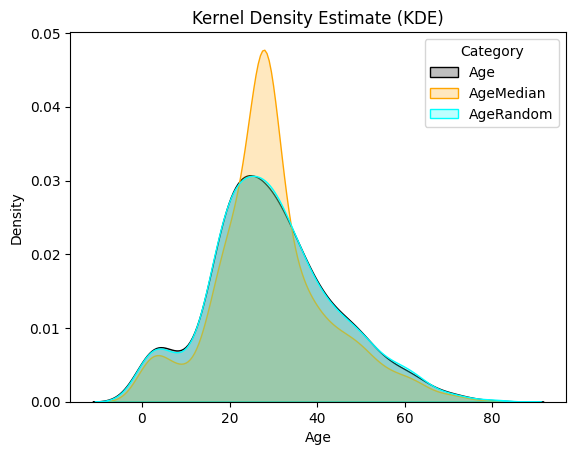

In [ ]:
sns.kdeplot(titanicDf['Age'],color = 'black', fill=True, label = 'Age')
sns.kdeplot(titanicDf['AgeMedian'],color = 'orange', fill=True, label = 'AgeMedian')
sns.kdeplot(titanicDf['AgeRandom'],color = 'aqua', fill=True, label = 'AgeRandom')

plt.title('Kernel Density Estimate (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Category')

plt.show()

---